In [1]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
print('Done')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Done


This project is based on Google play store data available in https://www.kaggle.com/datasets/lava18/google-play-store-apps, 10k Play Store apps for analysing the Android market.

After reviews processing, we'll train 2 deep learning models with diffrent architectures.

**For the statistical study please check GooglePlayStore_Analysis study on my Github**

In [2]:
gps_rev = pd.read_csv('googleplaystore_user_reviews.csv')
gps_rev.shape


(64295, 5)

In [3]:
gps_rev.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
gps_rev[['Translated_Review', 'Sentiment']]


,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
...,...,...
64290,NaN,NaN
64291,NaN,NaN
64292,NaN,NaN
64293,NaN,NaN


In [5]:
gps_rev = gps_rev.dropna()
gps_rev = gps_rev.reset_index(drop=True)


In [6]:
#Uniques values
gps_rev['Sentiment'].unique()


array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [7]:
#Null VALUES
gps_rev["Translated_Review"].isnull().sum()


0

In [8]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'" , "", data)
        
    return data

In [9]:
list_rev = []
#Splitting gps_rev to list
data_to_list = gps_rev["Translated_Review"].values.tolist()



In [10]:
for i in range(len(data_to_list)):
    list_rev.append(depure_data(data_to_list[i]))
list(list_rev[:5])

['I like eat delicious food. Thats Im cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
 'This help eating healthy exercise regular basis',
 'Works great especially going grocery store',
 'Best idea us',
 'Best way']

In [11]:
#to understand yield https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do
#Break sentences into words:
def break_sent2word(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        #gensim... Convert sentences into a list of tokens



In [12]:
data_words = list(break_sent2word(list_rev))

print(data_words[:20])

[['like', 'eat', 'delicious', 'food', 'thats', 'im', 'cooking', 'food', 'myself', 'case', 'best', 'foods', 'helps', 'lot', 'also', 'best', 'before', 'shelf', 'life'], ['this', 'help', 'eating', 'healthy', 'exercise', 'regular', 'basis'], ['works', 'great', 'especially', 'going', 'grocery', 'store'], ['best', 'idea', 'us'], ['best', 'way'], ['amazing'], ['looking', 'forward', 'app'], ['it', 'helpful', 'site', 'it', 'help', 'foods', 'get'], ['good', 'you'], ['useful', 'information', 'the', 'amount', 'spelling', 'errors', 'questions', 'validity', 'information', 'shared', 'once', 'fixed', 'stars', 'given'], ['thank', 'you', 'great', 'app', 'add', 'arthritis', 'eyes', 'immunity', 'kidney', 'liver', 'detox', 'foods', 'please'], ['greatest', 'ever', 'completely', 'awesome', 'maintain', 'health', 'this', 'must', 'ppl', 'there', 'love', 'it'], ['good', 'health', 'good', 'health', 'first', 'priority'], ['health', 'its', 'important', 'world', 'either', 'life', 'think'], ['mrs', 'sunita', 'bhati',

In [13]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

# to understand about TreebankWordDetokenizer
#https://www.nltk.org/_modules/nltk/tokenize/treebank.html

In [14]:
treated_rev = []
for i in range(len(data_words)):
    treated_rev.append(detokenize(data_words[i]))


In [15]:
print(treated_rev[:20])

['like eat delicious food thats im cooking food myself case best foods helps lot also best before shelf life', 'this help eating healthy exercise regular basis', 'works great especially going grocery store', 'best idea us', 'best way', 'amazing', 'looking forward app', 'it helpful site it help foods get', 'good you', 'useful information the amount spelling errors questions validity information shared once fixed stars given', 'thank you great app add arthritis eyes immunity kidney liver detox foods please', 'greatest ever completely awesome maintain health this must ppl there love it', 'good health good health first priority', 'health its important world either life think', 'mrs sunita bhati thankful developers to make kind app really good healthy food body', 'very useful in diabetes age need control sugar thanks', 'one greatest apps', 'good nice', 'healthy really helped', 'god health']


In [16]:
treated_rev = np.array(treated_rev)


In [17]:
treated_rev

array(['like eat delicious food thats im cooking food myself case best foods helps lot also best before shelf life',
       'this help eating healthy exercise regular basis',
       'works great especially going grocery store', ...,
       'dumb app wanted post property rent give option website work waste time space phone',
       'property business got link sms happy performance still guys need raise bar guys cheers',
       'useless app searched flats kondapur hyderabad none number reachable know flats unavailable would keep posts active'],
      dtype='<U2513')

## Creating new column Sentiment_num

convert the Sentiment labels from (Neutral, Negative, Positive) to a float type that our model can understand. To achieve this task, we'll implement the **to_categorical method** from Keras.

In [18]:
sent_labeled = np.array(gps_rev['Sentiment'])
y = []
for i in range(len(sent_labeled)):
    if sent_labeled[i] == 'Neutral':
        y.append(0)
    if sent_labeled[i] == 'Negative':
        y.append(1)
    if sent_labeled[i] == 'Positive':
        y.append(2)
y = np.array(y)
sent_labeled = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

We'll implement the Keras tokenizer as well as its pad_sequences method to transform our text data into 3D float data, otherwise our neural networks won't be able to be trained on it.



In [19]:
from tensorflow.keras.optimizers import RMSprop,Adam


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [21]:
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200


keras.preprocessing.text:
This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

By default, all punctuation is removed, turning the texts into space-separated sequences of words (words maybe include the ' character). These sequences are then split into lists of tokens. They will then be indexed or vectorized.

In [22]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(treated_rev)

**pad_sequences** is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.

**texts_to_sequences** method helps in converting tokens of text corpus into a sequence of integers


In [23]:
sequences = tokenizer.texts_to_sequences(treated_rev)
rev_vect_padded = pad_sequences(sequences, maxlen=max_len)
print(rev_vect_padded)

[[   0    0    0 ...  500 4799  266]
 [   0    0    0 ... 1042 1026 2149]
 [   0    0    0 ...  127 1874  323]
 ...
 [   0    0    0 ...   11  504   22]
 [   0    0    0 ...  605  219 3154]
 [   0    0    0 ...   58 1281 1206]]


In [24]:
print(sent_labeled)


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [25]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(rev_vect_padded,sent_labeled, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))


28070 9357 28070 9357


## Model building


Embedding layer enables us to convert each word into a fixed length vector of defined size. The resultant vector is a dense one

In [26]:
"""
Single LSTM layer model

"""

'\nSingle LSTM layer model\n\n'

In [27]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1])

2022-10-04 11:40:52.341029: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/70
878/878 [==============================] - ETA: 0s - loss: 0.6409 - accuracy: 0.7266
Epoch 1: val_accuracy improved from -inf to 0.81714, saving model to best_model1.hdf5
878/878 [==============================] - 55s 61ms/step - loss: 0.6409 - accuracy: 0.7266 - val_loss: 0.4635 - val_accuracy: 0.8171
Epoch 2/70
878/878 [==============================] - ETA: 0s - loss: 0.4027 - accuracy: 0.8439
Epoch 2: val_accuracy improved from 0.81714 to 0.87624, saving model to best_model1.hdf5
878/878 [==============================] - 51s 58ms/step - loss: 0.4027 - accuracy: 0.8439 - val_loss: 0.3482 - val_accuracy: 0.8762
Epoch 3/70
878/878 [==============================] - ETA: 0s - loss: 0.3291 - accuracy: 0.8808
Epoch 3: val_accuracy improved from 0.87624 to 0.88469, saving model to best_model1.hdf5
878/878 [==============================] - 50s 57ms/step - loss: 0.3291 - accuracy: 0.8808 - val_loss: 0.3288 - val_accuracy: 0.8847
Epoch 4/70
878/878 [=============================

In [28]:
"""
Bidirectional LTSM model

"""

'\nBidirectional LTSM model\n\n'

In [29]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint2])


Epoch 1/70
878/878 [==============================] - ETA: 0s - loss: 0.6196 - accuracy: 0.7293
Epoch 1: val_accuracy improved from -inf to 0.82420, saving model to best_model2.hdf5
878/878 [==============================] - 81s 89ms/step - loss: 0.6196 - accuracy: 0.7293 - val_loss: 0.4507 - val_accuracy: 0.8242
Epoch 2/70
878/878 [==============================] - ETA: 0s - loss: 0.3882 - accuracy: 0.8526
Epoch 2: val_accuracy improved from 0.82420 to 0.87977, saving model to best_model2.hdf5
878/878 [==============================] - 77s 88ms/step - loss: 0.3882 - accuracy: 0.8526 - val_loss: 0.3425 - val_accuracy: 0.8798
Epoch 3/70
878/878 [==============================] - ETA: 0s - loss: 0.3199 - accuracy: 0.8846
Epoch 3: val_accuracy improved from 0.87977 to 0.89046, saving model to best_model2.hdf5
878/878 [==============================] - 78s 89ms/step - loss: 0.3199 - accuracy: 0.8846 - val_loss: 0.3070 - val_accuracy: 0.8905
Epoch 4/70
878/878 [=============================

In [30]:
#best model obtained during training

best_model = keras.models.load_model("best_model2.hdf5")


In [32]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)


293/293 - 6s - loss: 0.2096 - accuracy: 0.9391 - 6s/epoch - 20ms/step
Model accuracy:  0.9390830397605896


In [33]:
predictions = best_model.predict(X_test)


In [34]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))


<AxesSubplot:>

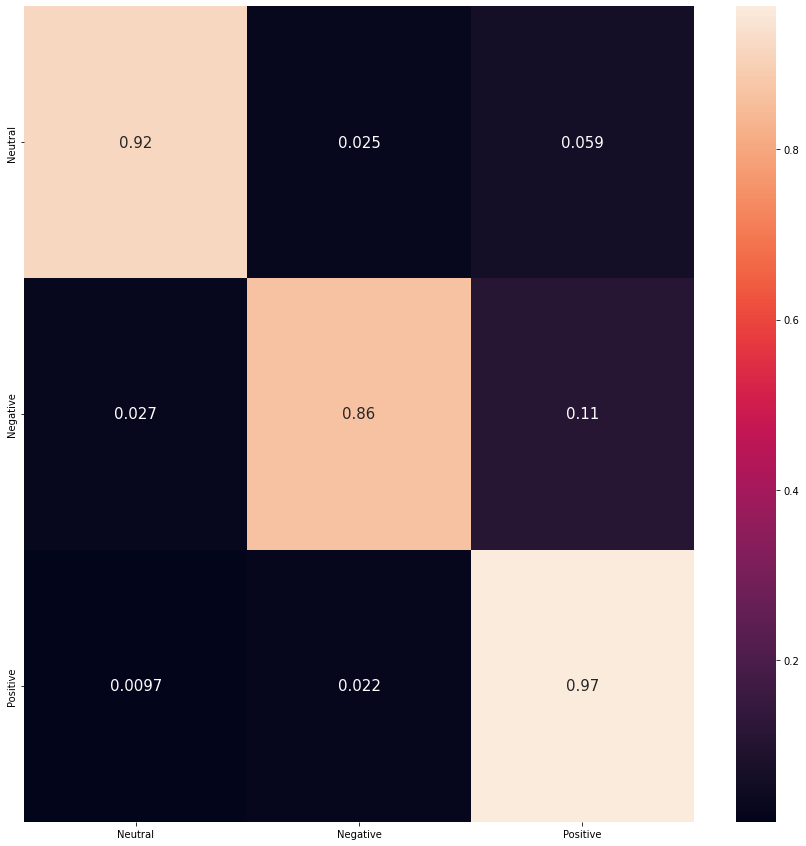

In [35]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

Let's see how it performs on some test

In [36]:
sentiment = ['Neutral','Negative','Positive']


In [37]:
sequence = tokenizer.texts_to_sequences(['this experience has been the worst , want a refund'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]


'Negative'

In [38]:
sequence = tokenizer.texts_to_sequences(['this data science article was preety much good'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'

In [39]:
sequence = tokenizer.texts_to_sequences(['I am confused about this experience'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Negative'